https://bitbucket.org/smason/ectools/src/main/

In [1]:
# General
import os
import glob

# Display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm

# Data treatment
import xarray as xr
import numpy as np
# from scipy.interpolate import griddata
import pandas as pd 
from tqdm import tqdm
import ephem
import seaborn as sns

# Custom
import sys
sys.path.append('../ectools')
from ectools import ecio
from ectools import ecplot as ecplt
from ectools import colormaps

# Default parameters
fontsize = 16
mpl.rcParams.update({'font.size': fontsize})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [50]:
### Open SAR
dsg_sar    = xr.open_dataset('/home/arthur/results/sar_extended/05_addPRIMED/dsg.nc')

# Leslie
dss_leslie = dsg_sar.where(dsg_sar.name == 'LESLIE', drop=True)
dsl        = dss_leslie.isel(time=-1)

# Parameters
lat_center = 22.6
lat_rmx    = lat_center + dsl.rmx / 110574
lat_rps    = lat_center + dsl.rps / 110574
lat_r0     = lat_center + dsl.r0 / 110574
# Latitude: 1 deg = 110.574 km

In [19]:
### EarthCARE paths
# Level-1
pCNOM   = '/home/arthur/data/earthCARE/samples/Level_1B/ECA_JXAE_CPR_NOM_1B_20241010T050822Z_20241010T102937Z_02089B/ECA_JXAE_CPR_NOM_1B_20241010T050822Z_20241010T102937Z_02089B.h5'
# Level-2
pACMCAP = '/home/arthur/data/earthCARE/samples/Level_2B/ACM_CAP_2B_2024_10_10/ECA_EXAA_ACM_CAP_2B_20241010T050822Z_20241010T104924Z_02089B/ECA_EXAA_ACM_CAP_2B_20241010T050822Z_20241010T104924Z_02089B.h5'
pACMCLP = '/home/arthur/data/earthCARE/samples/Level_2B/ACM_CLP_2B_2024_10_10/ECA_JXAA_ACM_CLP_2B_20241010T050822Z_20241010T124805Z_02089B/ECA_JXAA_ACM_CLP_2B_20241010T050822Z_20241010T124805Z_02089B.h5'
pACTC   = '/home/arthur/data/earthCARE/samples/Level_2B/ECA_EXAA_AC__TC__2B_20241010T050822Z_20241010T104634Z_02089B/ECA_EXAA_AC__TC__2B_20241010T050822Z_20241010T104634Z_02089B.h5'

In [3]:
# ACTC = ecio.load_ACTC(pACTC)

# fig, axes = ecplt.quicklook_ACTC(ACTC)

# ACTC.close()

In [4]:
lat_boundaries = [22.2, 26]

CNOM = ecio.load_CNOM(
    pCNOM,
    trim={'latitude': slice(lat_boundaries[0], lat_boundaries[1])}
)

ACTC = ecio.load_ACTC(
    pACTC,
    trim={'latitude': slice(lat_boundaries[0], lat_boundaries[1])}
)

ACMCAP = ecio.load_ACMCAP(
    pACMCAP,
    trim={'latitude': slice(lat_boundaries[0], lat_boundaries[1])}
)

ACMCLP = ecio.load_ACMCLP(
    pACMCLP,
    trim={'latitude': slice(lat_boundaries[0], lat_boundaries[1])}
)

# fig, axes = ecplt.quicklook_ACTC(ACTC)

# ACTC.close()

Selecting frame from 28 to 9916
Trimming by latitude
Trimming by latitude
FrozenMappingWarningOnValuesAccess({'along_track': 4945, 'CPR_height': 200, 'phony_dim_5': 10})
FrozenMappingWarningOnValuesAccess({'along_track': 4945, 'CPR_height': 200})
Selecting frame from 0 to 4944


In [5]:
hmax = 20000

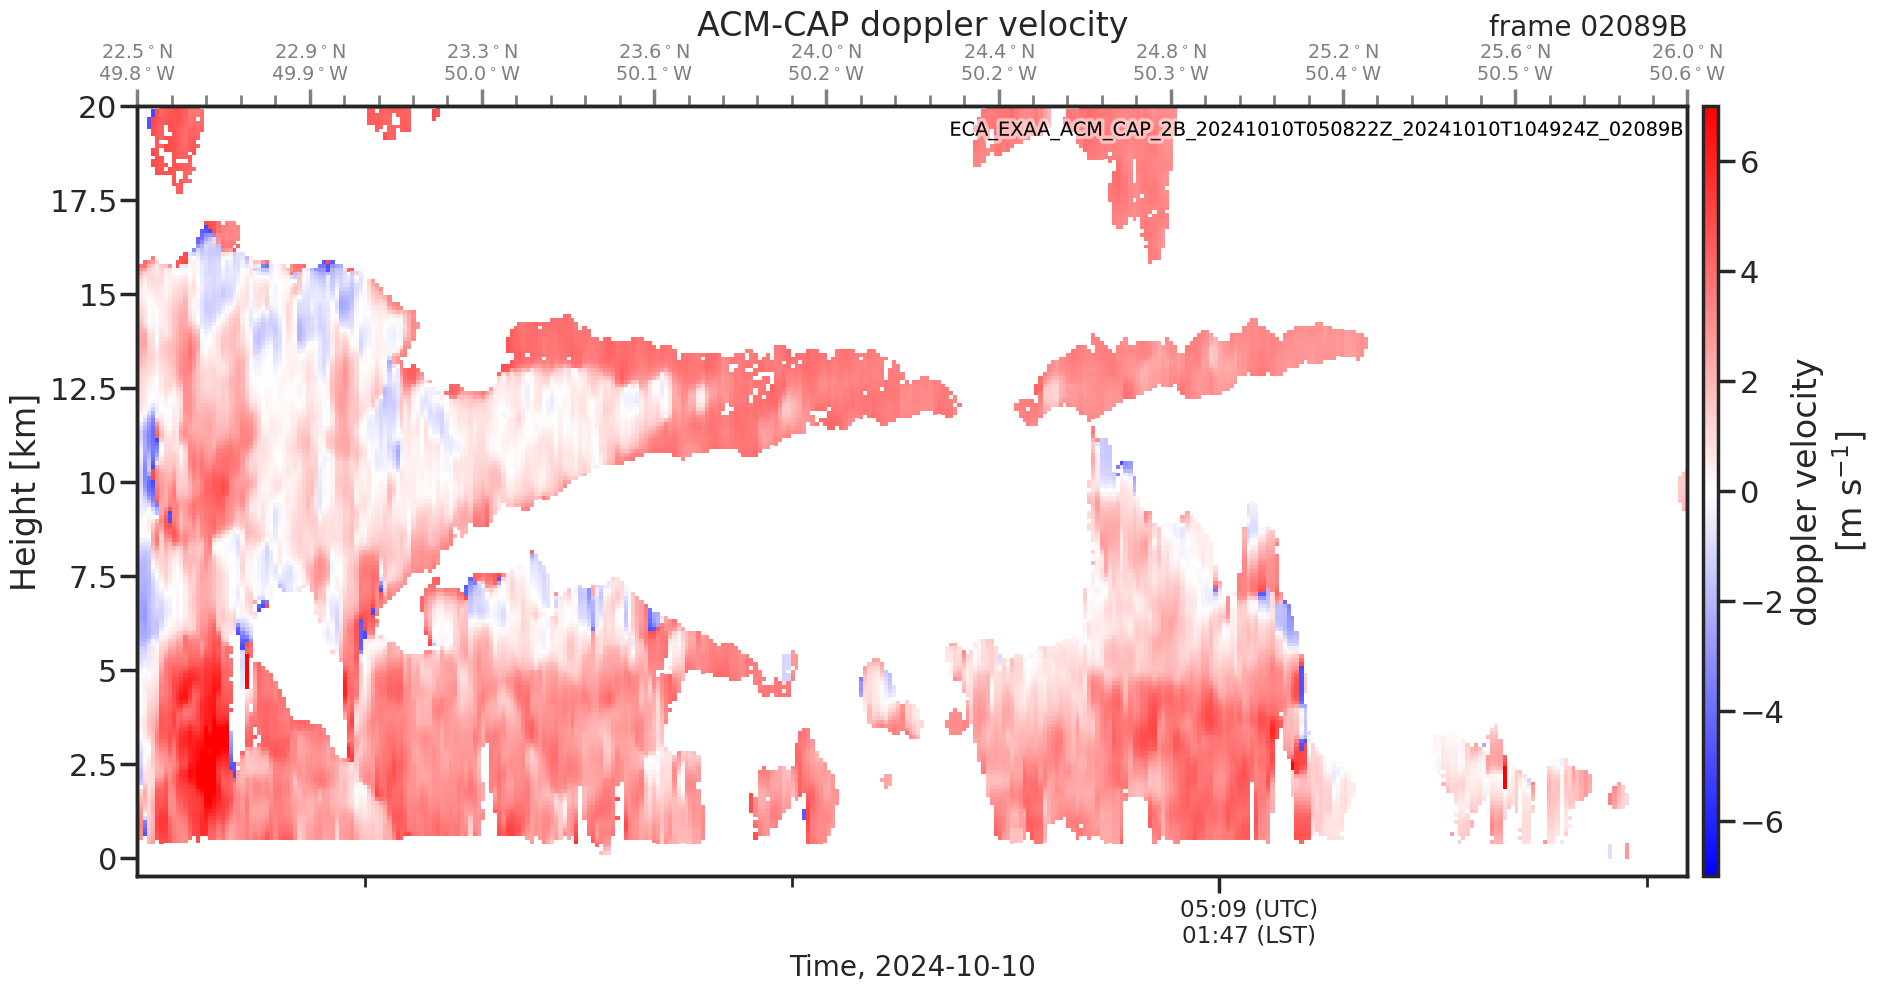

In [6]:
fig, ax  = plt.subplots(figsize=(20, 10))
ecplt.plot_EC_2D(ax, ACMCAP, 'CPR_doppler_velocity', "doppler velocity", units="m s$^{-1}$", plot_scale='linear', plot_range=[-7, 7], cmap='bwr', hmax=hmax)

In [7]:
ACTC_category_colors = [sns.xkcd_rgb['silver'],         #unknown
                        sns.xkcd_rgb['reddish brown'],         #surface and subsurface
                        sns.xkcd_rgb['white'],         #clear
                        sns.xkcd_rgb['dull red'],      #rain in clutter
                        sns.xkcd_rgb['off blue'],     #snow in clutter
                        sns.xkcd_rgb['dull yellow'],   #cloud in clutter
                        sns.xkcd_rgb['dark red'],      #heavy rain',
                        sns.xkcd_rgb["navy blue"],   #heavy mixed-phase precipitation
                        sns.xkcd_rgb['light grey'],    #clear (poss. liquid) 
                        sns.xkcd_rgb['pale yellow'],   #liquid cloud
                        sns.xkcd_rgb['golden'],        #drizzling liquid
                        sns.xkcd_rgb['orange'],        #warm rain
                        sns.xkcd_rgb['bright red'],    #cold rain
                        sns.xkcd_rgb['easter purple'], # melting snow
                        sns.xkcd_rgb['dark sky blue'],        # snow (possible liquid)
                        sns.xkcd_rgb['bright blue'], # snow
                        sns.xkcd_rgb["prussian blue"],   # rimed snow (poss. liquid)
                        sns.xkcd_rgb['dark teal'],   # rimed snow and SLW
                        sns.xkcd_rgb['teal'],              # snow and SLW
                        sns.xkcd_rgb['light green'],   # supercooled liquid
                        sns.xkcd_rgb["sky blue"],      # ice (poss. liquid)
                        sns.xkcd_rgb['bright teal'],   # ice and SLW
                        sns.xkcd_rgb['light blue'],    # ice (no liquid)
                        sns.xkcd_rgb['pale blue'],     # strat. ice, PSC II
                        sns.xkcd_rgb['neon green'],    # PSC Ia
                        sns.xkcd_rgb['greenish cyan'], # PSC Ib
                        sns.xkcd_rgb['ugly green'],    # insects
                        sns.xkcd_rgb['sand'],          # dust
                        sns.xkcd_rgb['pastel pink'],   # sea salt
                        sns.xkcd_rgb['dust'],          # continental pollution
                        sns.xkcd_rgb['purpley grey'],  # smoke
                        sns.xkcd_rgb['dark lavender'], # dusty smoke
                        sns.xkcd_rgb['dusty lavender'],# dusty mix
                        sns.xkcd_rgb['pinkish grey'],  # stratospheric aerosol 1 (ash)
                        sns.xkcd_rgb['light khaki'],       # stratospheric aerosol 2 (sulphate)
                        sns.xkcd_rgb['light grey'],    # stratospheric aerosol 3 (smoke)]
                  ]

22.780874346591425 23.069549803751336 23.87634259751586


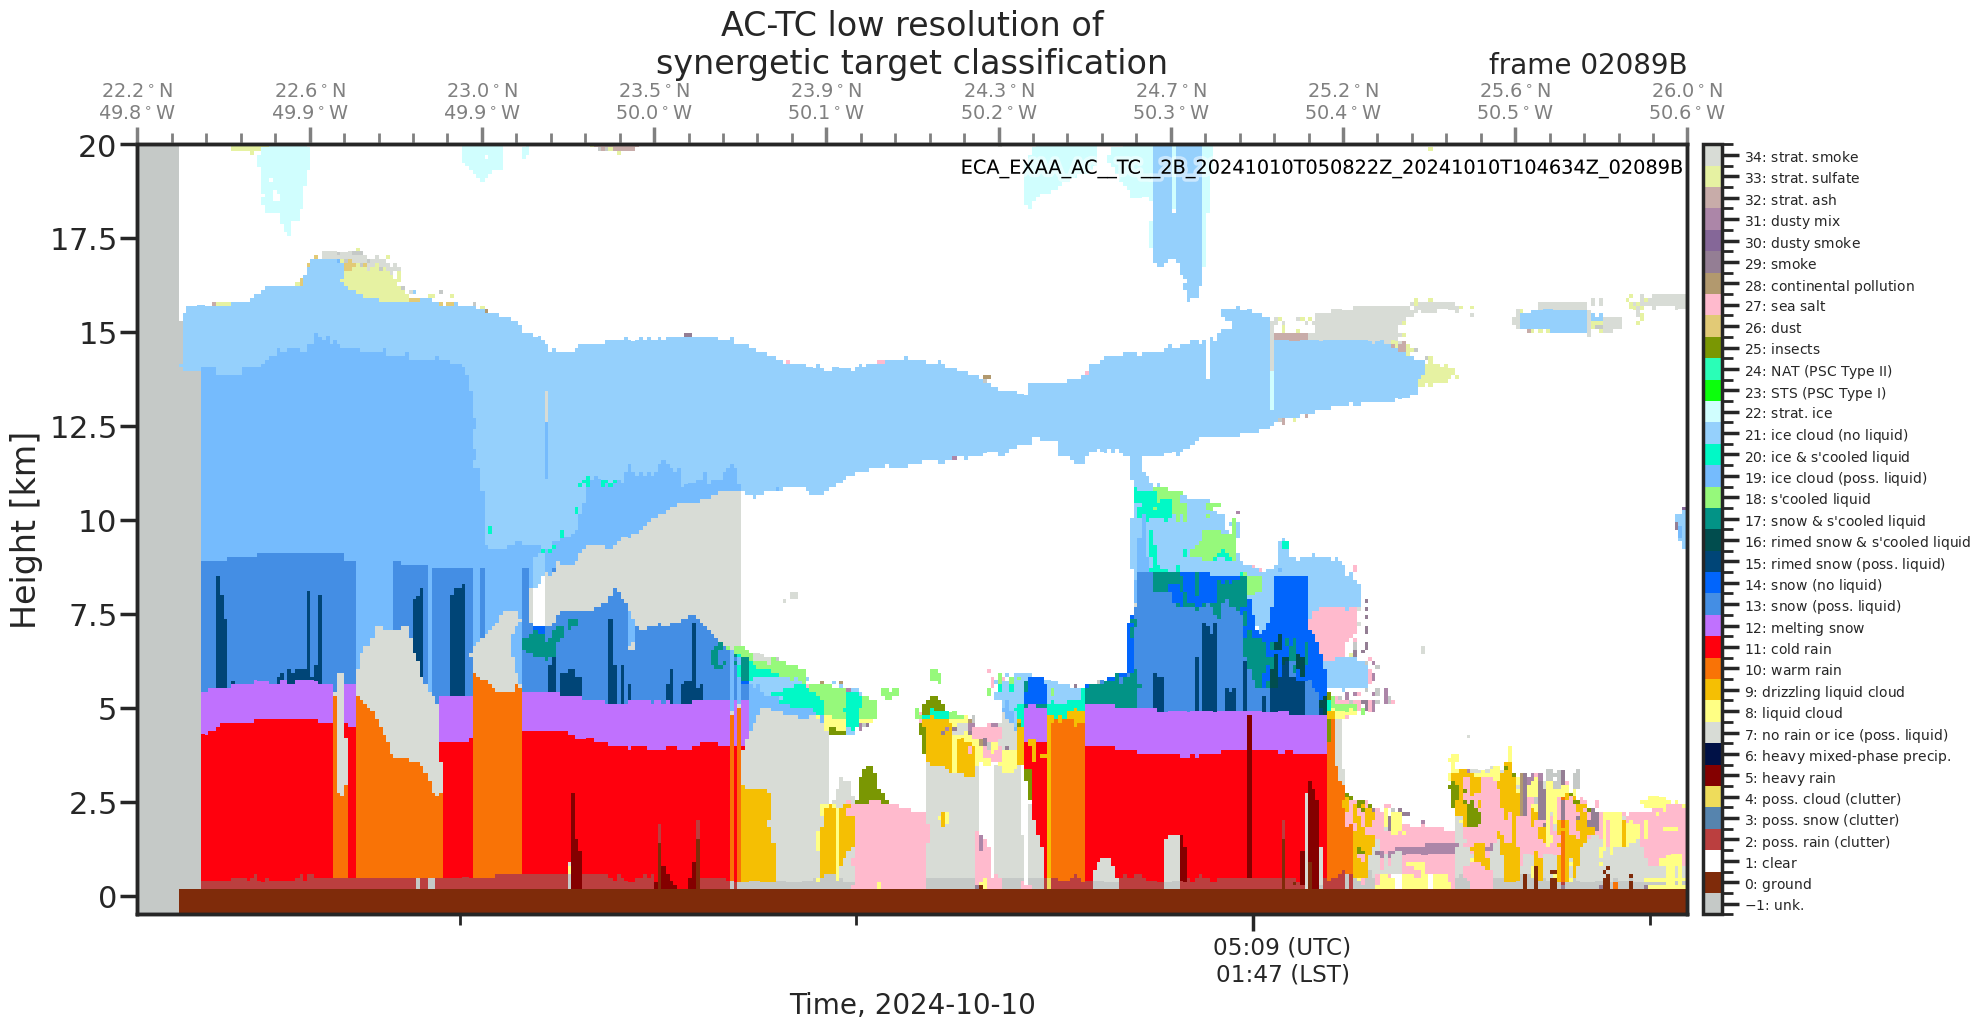

In [59]:
fig, ax  = plt.subplots(figsize=(20, 10))
print(float(lat_rmx), float(lat_rps), float(lat_r0))
ecplt.plot_EC_target_classification(ax, ACTC, 'synergetic_target_classification_low_resolution', ACTC_category_colors, title_prefix="", label_fontsize=10, hmax=hmax)

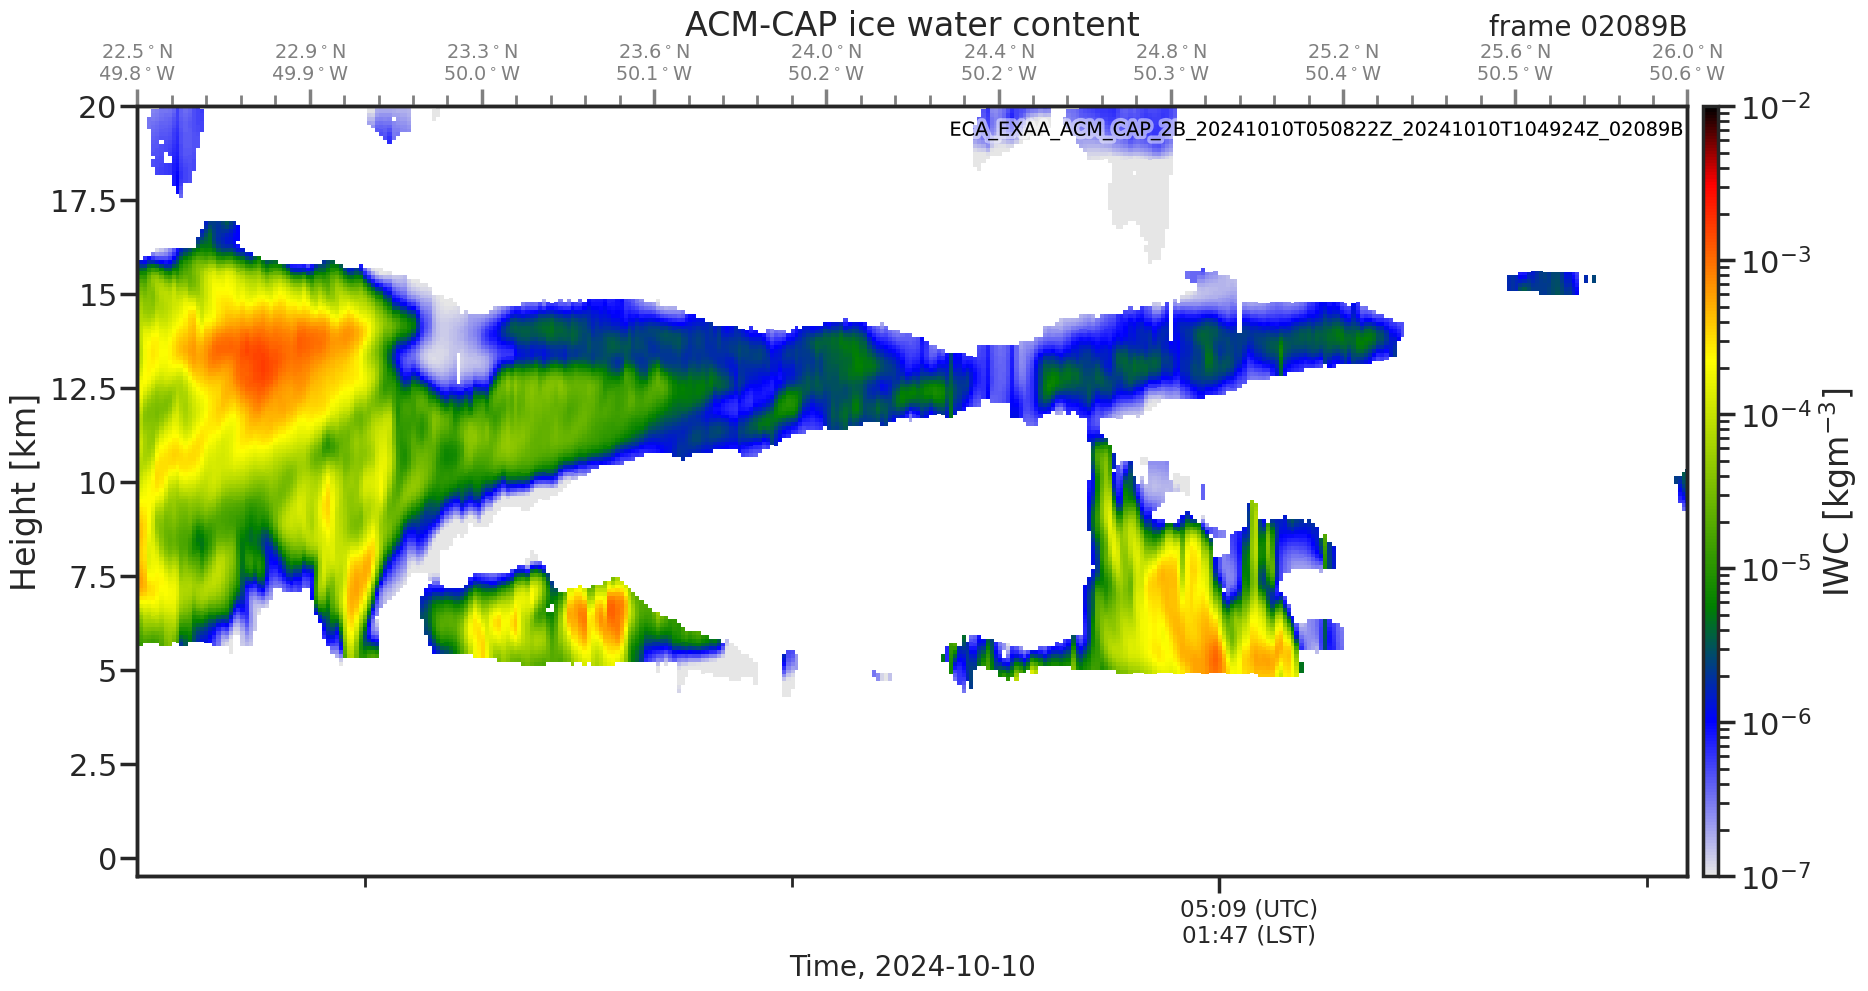

In [61]:
fig, ax  = plt.subplots(figsize=(20, 10))
ecplt.plot_EC_2D(ax, ACMCAP, 'ice_water_content', "IWC", units="kgm$^{-3}$", plot_scale='log', plot_range=[1e-7,10e-3], cmap=colormaps.chiljet2, hmax=hmax)

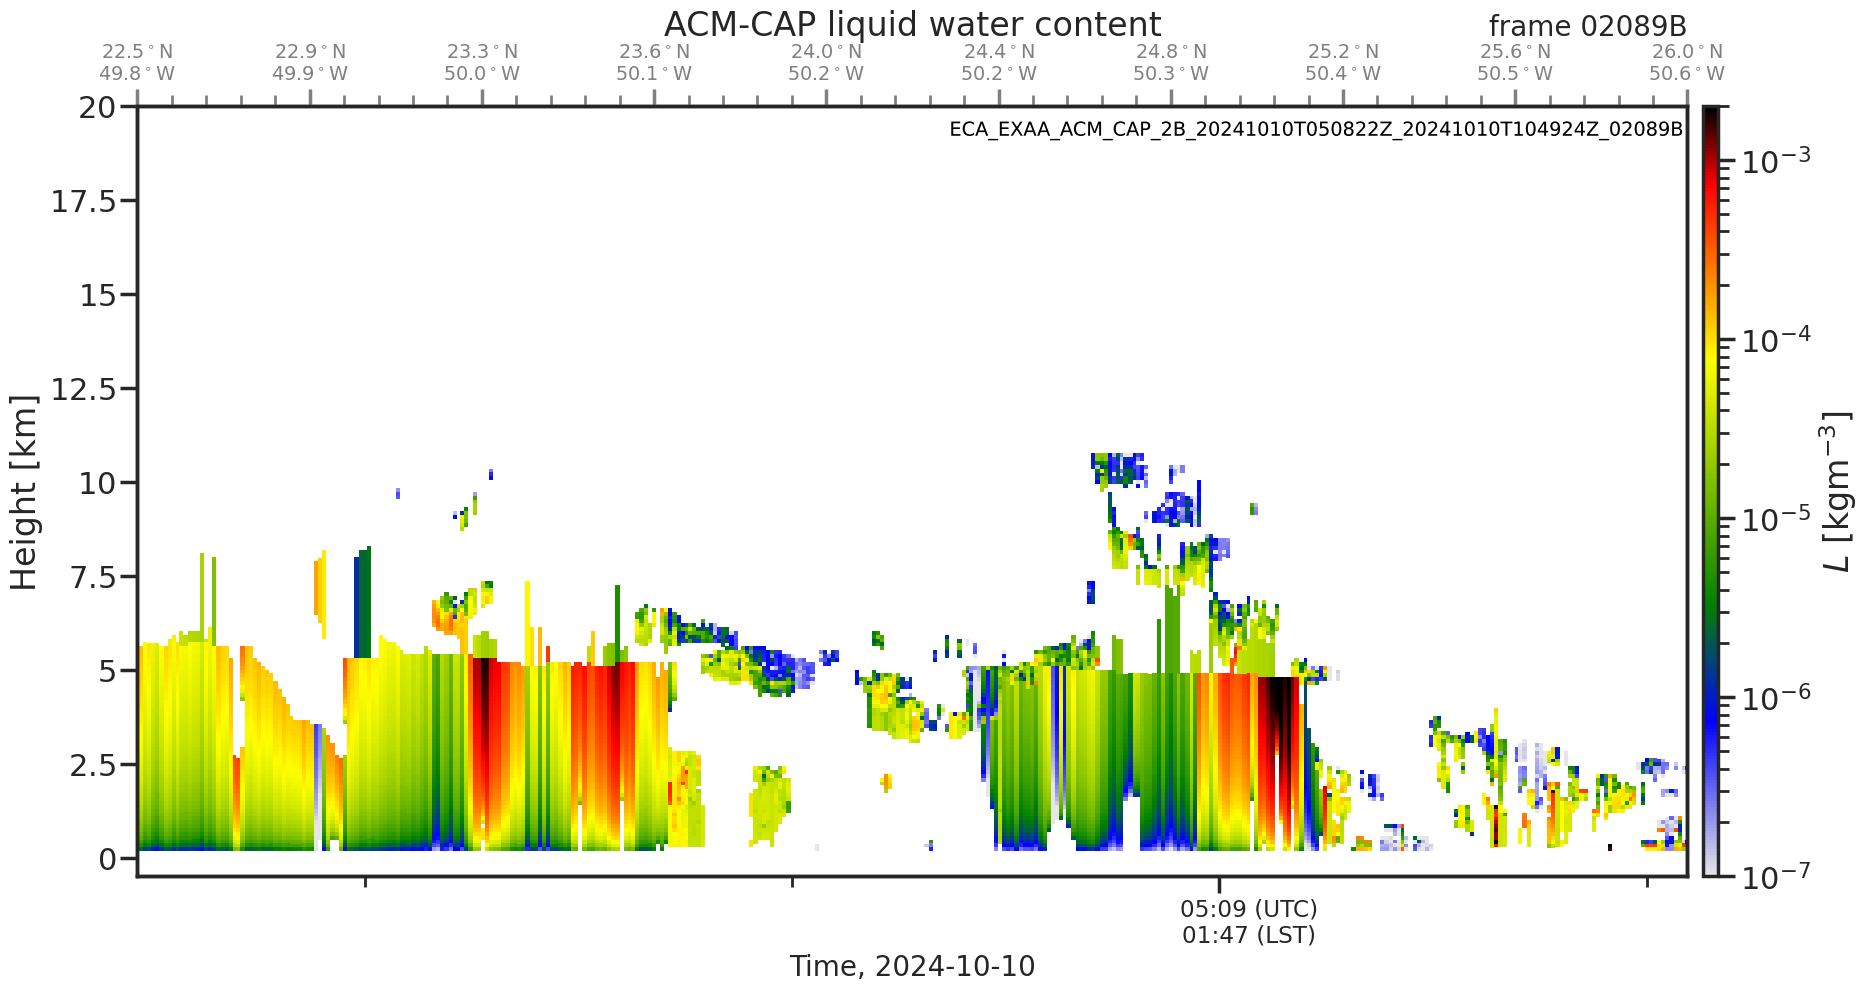

In [62]:
fig, ax  = plt.subplots(figsize=(20, 10))
ecplt.plot_EC_2D(ax, ACMCAP, 'liquid_water_content', "$L$", units="kgm$^{-3}$", plot_scale='log', plot_range=[1e-7,2e-3], cmap=colormaps.chiljet2, hmax=hmax)

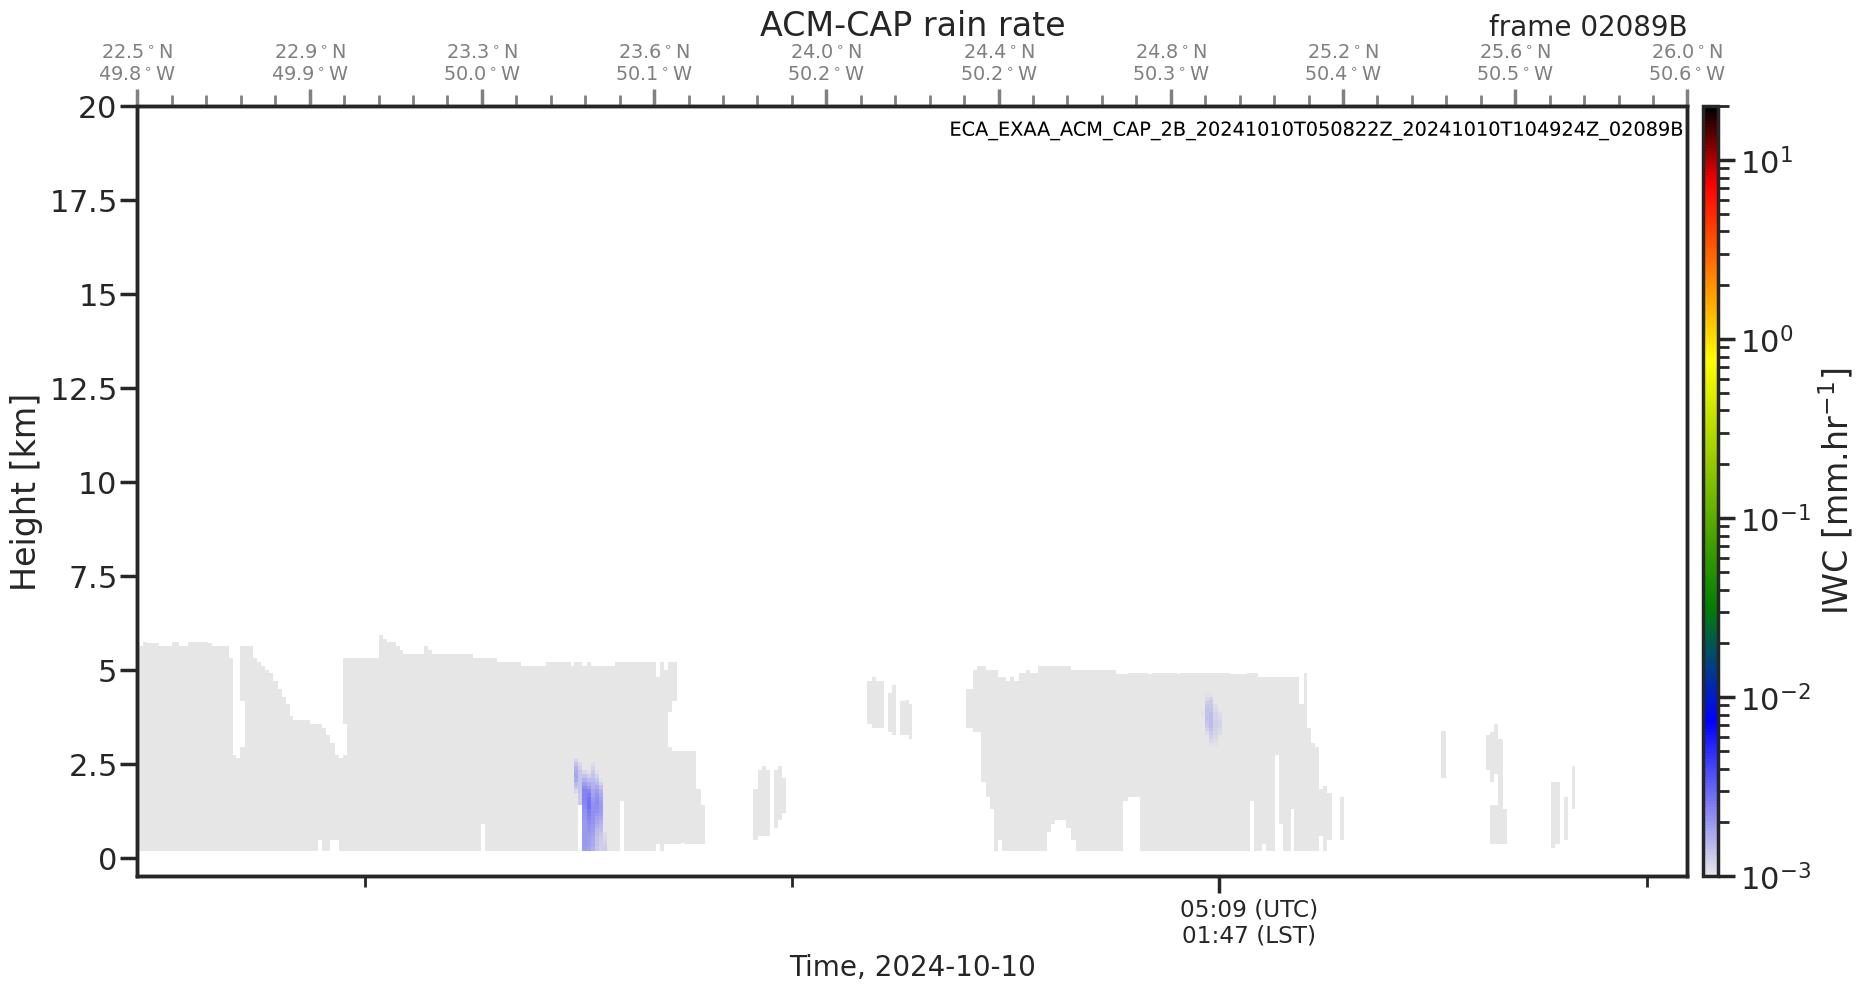

In [68]:
fig, ax  = plt.subplots(figsize=(20, 10))
ecplt.plot_EC_2D(ax, ACMCAP, 'rain_rate', "IWC", units="mm.hr$^{-1}$", plot_scale='log', plot_range=[1e-3,20], cmap=colormaps.chiljet2, hmax=hmax)

In [13]:
# # I don't manage to select boundaries
# ecplt.quicklook_CNOM(CNOM)

In [17]:
# # I don't manage to print ACMPCLP data correctly... Maybe ask Shannon
# fig, ax  = plt.subplots(figsize=(20, 10))
# ecplt.plot_EC_2D(ax, ACMCLP, 'cloud_air_velocity_1km', 'Cloud air motion', hmax=hmax)

Try to plot the sedimentation velocity from the bitbucket example "demonstrate_ectools.ipynb"
It's at the end of the notebook
First download the file CPR_CD